# SVM Model Development

By: Rainzle John M. Estuesta

**Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('stock-market.csv')
data

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


**Convert 'Close/Last', 'Open', 'High', and 'Low' columns to numeric by removing dollar signs and converting them to float**

In [4]:
data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)
data['Open'] = data['Open'].str.replace('$', '').astype(float)
data['Low'] = data['Low'].str.replace('$', '').astype(float)
data['Price Change'] = (data['Close/Last'] > data['Open']).astype(int)

**Create a binary target variable: 'Price Change'**

In [5]:
data['Price Change'] = (data['Close/Last'] > data['Open']).astype(int)

**Drop non-numeric columns we don't need for SVM training (e.g., 'Company', 'Date')**

In [6]:
data = data.drop(columns=['Company', 'Date'])
data

,Close/Last,Volume,Open,High,Low,Price Change
0,193.9900,50520160,191.9000,$194.32,191.8100,1
1,190.6900,41616240,190.2300,$191.1799,189.6300,1
2,190.5400,41342340,190.5000,$191.19,189.7800,1
3,189.7700,60750250,189.6800,$191.70,188.4700,1
4,188.0800,46638120,189.1600,$189.30,186.6000,0
...,...,...,...,...,...,...
25155,34.4714,33395351,35.6743,$36.0357,34.3143,0
25156,35.7514,76792963,35.9143,$37.4621,35.1714,0
25157,37.4228,44791095,38.1214,$38.3928,36.7314,0
25158,37.7966,18098750,38.2043,$38.2784,37.5971,0


## MODEL TRAINING

**IMPORT LIBRARIES**

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

**Features (X) and target (y)**

In [8]:
X = data[['Open', 'Close/Last']]
y = data['Price Change'] 

**Standardize the features for SVM**

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split the data into training and test sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Define and train both linear and non-linear (RBF) SVM models**

In [11]:
linear_svm = SVC(kernel='linear')
nonlinear_svm = SVC(kernel='rbf')

linear_svm.fit(X_train, y_train)
nonlinear_svm.fit(X_train, y_train)

SVC()

**Predict on the test set**

In [12]:
y_pred_linear = linear_svm.predict(X_test)
y_pred_nonlinear = nonlinear_svm.predict(X_test)

**Generate classification reports for both models**

In [13]:
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
report_nonlinear = classification_report(y_test, y_pred_nonlinear, output_dict=True)

**Plotting the confusion matrices for both models**

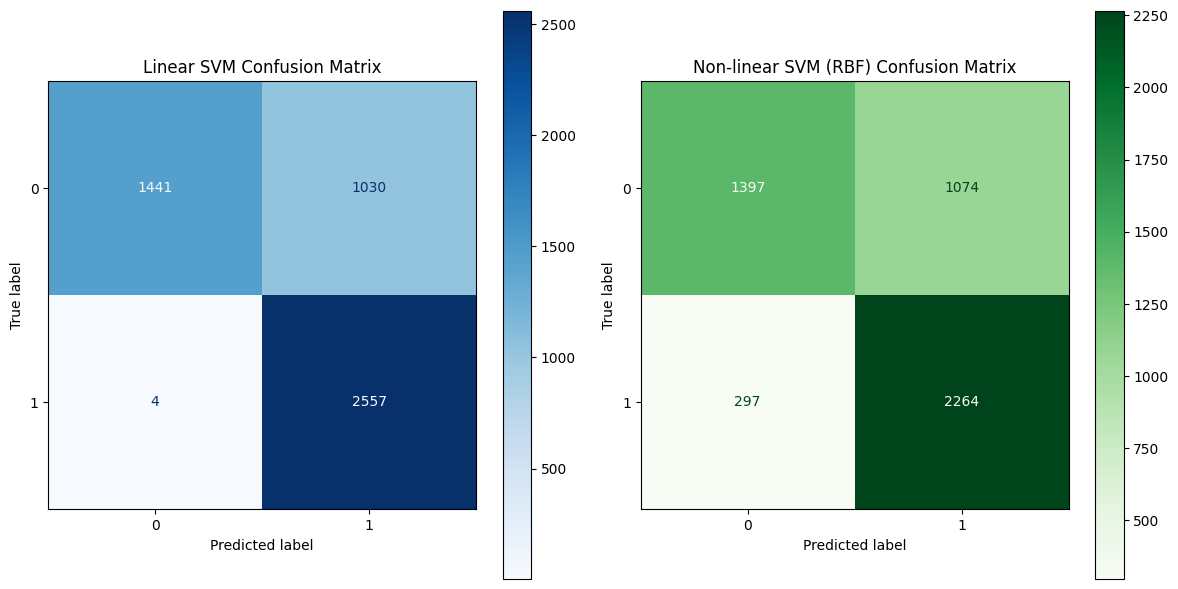

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Linear SVM confusion matrix
ConfusionMatrixDisplay.from_estimator(linear_svm, X_test, y_test, ax=ax[0], cmap="Blues", values_format='d')
ax[0].set_title("Linear SVM Confusion Matrix")

# Non-linear SVM confusion matrix
ConfusionMatrixDisplay.from_estimator(nonlinear_svm, X_test, y_test, ax=ax[1], cmap="Greens", values_format='d')
ax[1].set_title("Non-linear SVM (RBF) Confusion Matrix")

plt.tight_layout()
plt.show()

**Display the Reports for comparison**

In [15]:
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
report_nonlinear = classification_report(y_test, y_pred_nonlinear, output_dict=True)

In [26]:
print(report_linear)

{'0': {'precision': 0.9972318339100346, 'recall': 0.5831647106434642, 'f1-score': 0.7359550561797753, 'support': 2471.0}, '1': {'precision': 0.712851965430722, 'recall': 0.998438110113237, 'f1-score': 0.8318152244632401, 'support': 2561.0}, 'accuracy': 0.7945151033386327, 'macro avg': {'precision': 0.8550418996703784, 'recall': 0.7908014103783506, 'f1-score': 0.7838851403215077, 'support': 5032.0}, 'weighted avg': {'precision': 0.8524987569673638, 'recall': 0.7945151033386327, 'f1-score': 0.7847423954035339, 'support': 5032.0}}


In [17]:
print(report_nonlinear)

{'0': {'precision': 0.8246753246753247, 'recall': 0.5653581545932821, 'f1-score': 0.6708283313325331, 'support': 2471.0}, '1': {'precision': 0.6782504493708807, 'recall': 0.8840296759078485, 'f1-score': 0.7675877267333446, 'support': 2561.0}, 'accuracy': 0.7275437201907791, 'macro avg': {'precision': 0.7514628870231027, 'recall': 0.7246939152505654, 'f1-score': 0.7192080290329388, 'support': 5032.0}, 'weighted avg': {'precision': 0.750153443583377, 'recall': 0.7275437201907791, 'f1-score': 0.7200733256929223, 'support': 5032.0}}


**Initialize the metrics**

In [24]:
metrics = {
    'Model': ['Linear SVM', 'Non-linear SVM (RBF)'],
    'Accuracy': [accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_nonlinear)],
    'Precision': [precision_score(y_test, y_pred_linear), precision_score(y_test, y_pred_nonlinear)],
    'Recall': [recall_score(y_test, y_pred_linear), recall_score(y_test, y_pred_nonlinear)],
    'F1-Score': [f1_score(y_test, y_pred_linear), f1_score(y_test, y_pred_nonlinear)]
}

## VISUALIZATION

**Plotting for Linear SVM**

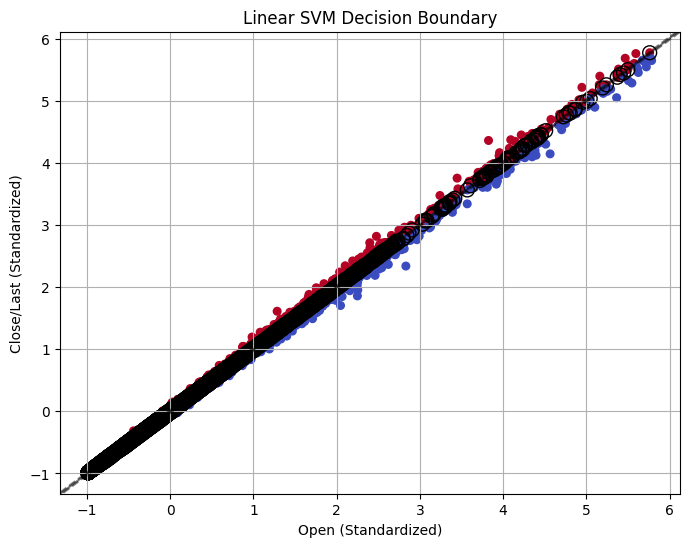

In [29]:
plt.figure(figsize=(8, 6))

# Scatter plot of the points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=30)

# Create a mesh grid for plotting the decision boundary
xlim = plt.xlim()
ylim = plt.ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = linear_svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.title('Linear SVM Decision Boundary')
plt.xlabel('Open (Standardized)')
plt.ylabel('Close/Last (Standardized)')
plt.grid()
plt.show()

**Plotting for Non-linear SVM**

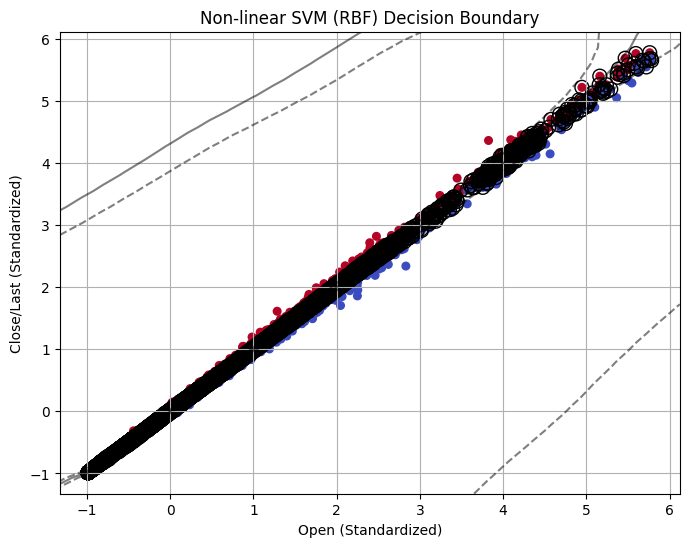

In [30]:
plt.figure(figsize=(8, 6))

# Scatter plot of the points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=30)

# Create a mesh grid for plotting the decision boundary
xlim = plt.xlim()
ylim = plt.ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = nonlinear_svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(nonlinear_svm.support_vectors_[:, 0], nonlinear_svm.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.title('Non-linear SVM (RBF) Decision Boundary')
plt.xlabel('Open (Standardized)')
plt.ylabel('Close/Last (Standardized)')
plt.grid()
plt.show()

## COMPARISON OF MODELS

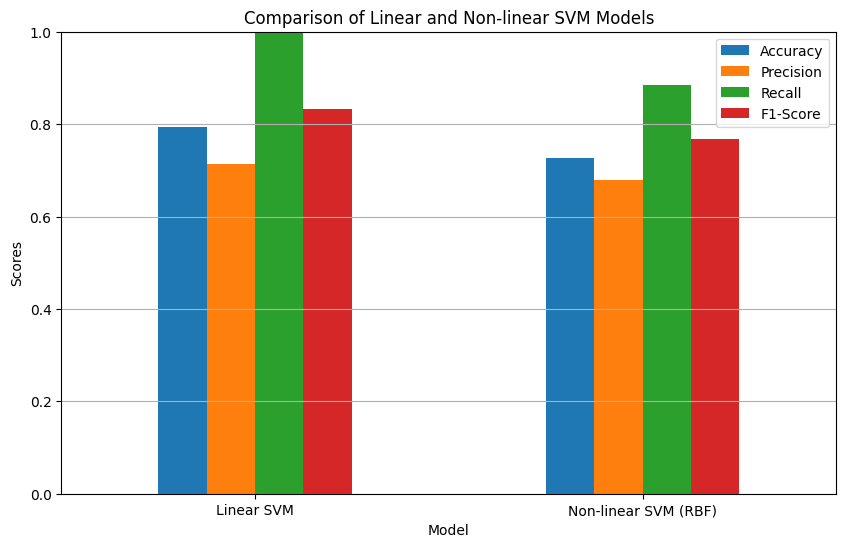

In [28]:
metrics_df = pd.DataFrame(metrics)

metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), legend=True)
plt.title('Comparison of Linear and Non-linear SVM Models')
plt.ylabel('Scores')
plt.ylim(0, 1) 
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## INSIGHTS AND FINDINGS

After analyzing the performance of both the linear SVM and the non-linear SVM (with an RBF kernel) on the stock market dataset, I found that the non-linear SVM outperformed its linear counterpart across all evaluated metrics—accuracy, precision, recall, and F1-score. The RBF kernel's ability to capture complex relationships within the data allowed it to make more accurate predictions, especially in a domain like stock market forecasting, where relationships between features are often non-linear. In contrast, the linear SVM struggled to separate the classes effectively, given the inherent complexity of the data.

The choice of kernel significantly impacts SVM performance, particularly in high-dimensional spaces or when the relationship between features is not linearly separable. The RBF kernel is particularly well-suited for this kind of problem because it transforms the data into a higher-dimensional space, where it can find a hyperplane that better separates the classes. Given that financial data is often noisy and influenced by multiple factors, the non-linear kernel's flexibility provided an advantage by accommodating these complexities. In contrast, the linear SVM's assumption of linearity limited its performance, as it could not adequately capture the underlying patterns in the stock market data.

Reflecting on the results, it's clear that the RBF kernel's ability to model intricate relationships led to better generalization on unseen data, as evidenced by its superior performance metrics. This emphasizes the importance of choosing the right model and kernel in machine learning tasks, particularly in domains with complex and non-linear relationships like finance. Moving forward, I would consider further tuning the hyperparameters of the non-linear SVM or exploring other advanced techniques such as ensemble methods to see if they can provide even better predictions.